<h1 style='font-family: Trebuchet MS; color:#34495E'> DataSet <a id='0'></a></h1>
<p style='font-family:Trebuchet MS'>The dataset can be found on <a href='https://www.kaggle.com/anthonypino/melbourne-housing-market'> Kaggle </a>.

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Libraries <a id='0.1'></a></h3>

In [1]:
import pandas as pd

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Data <a id='0.2'></a></h3>

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<h1 style='font-family:Trebuchet MS; color:#34495E'> Table of Contents </h1>

<div class='alert alert-block alert-info' style='font-family:Trebuchet MS; color:#34495E'>

1.[DataSet](#0)<br>
2.[Feature Selection Method](#1) <br>
3.[Pearson's](#2) <br>
4. [Model Development ](#3)<br>
5. [Model Evaluation](#4)<br>

        
</div>

<h1 style='font-family: Trebuchet MS; color:#34495E'> Feature Selection Method <a id='1'></a></h1>

<img src='https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png'>

<a href='https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/'> Feature Selection Reference </a>

<h4 style='font-family: Trebuchet MS; color:#34495E'> Feature Selection <a id='1.1'></a></h4>
<p style='font-family: Trebuchet MS'>We would use the above Decision Tree to choose our Feature Selection Method. There are numerical and categorical variables in our data that can help us to predict the target variable <code>Price</code>. But in the first case, we would use the numerical variable first (eg. <code>Bedroom2, Bathroom, Rooms, etc.</code>. Since our output variable, <code>Price</code> is Numerical, we would use <b>Pearson's</b> in the first case.

<h1 style='font-family: Trebuchet MS; color:#34495E'> Pearson's <a id='2'></a></h1>

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Libraries <a id='2.1'></a></h3>

In [4]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

<h4 style='font-family: Trebuchet MS; color:#34495E'> Data Preparation <a id='2.1'></a></h4>

In [5]:
df_numerical = df.select_dtypes(include=['number'])
df_numerical = df_numerical.drop(columns=['Postcode', 'Lattitude','Longtitude'])
df_numerical = df_numerical.dropna(subset=['Price'])

In [6]:
df_numerical.isnull().sum()

Rooms                0
Price                0
Distance             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
Propertycount        3
dtype: int64

<p style='font-family: Trebuchet MS'> There are quite a lot of the columns consists of null values. But I have no domain expertise in this area, it would be better for me to just drop them.

In [7]:
df_numerical = df_numerical.dropna()

In [8]:
now = datetime.datetime.now()
year = now.year

In [9]:
df_numerical['Age'] = year - df_numerical['YearBuilt']

In [10]:
df_numerical.isnull().sum()

Rooms            0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
Age              0
dtype: int64

<h4 style='font-family: Trebuchet MS; color:#34495E'> Correlation Coefficient Visualization <a id='2.1'></a></h4>

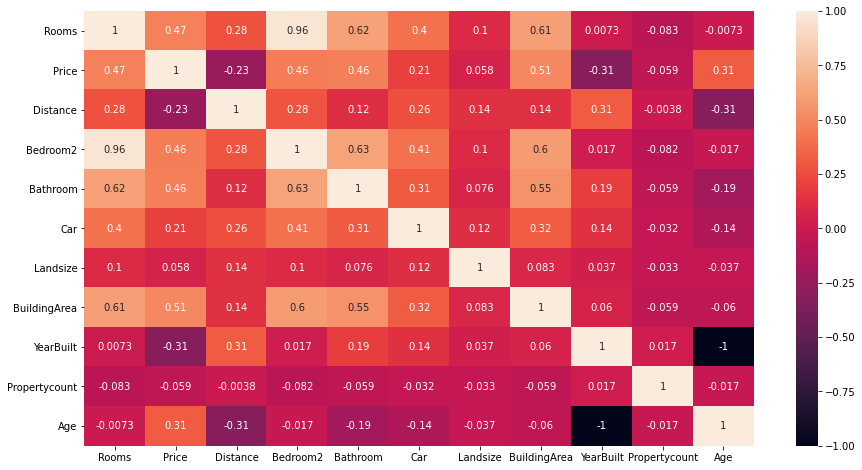

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df_numerical.corr(), annot=True)
plt.show()

<h4 style='font-family: Trebuchet MS; color:#34495E'> Conclusion: <a id='2.1'></a></h4>
<p style='font-family: Trebuchet MS'> From the above correlation heat map, we can observe that the <code>Price</code> has a little positive or negative relationship with the other variables except (<code>Propertycount</code>). So, I would use all of the variables except (<code>Propertycount</code>) to predict <code>Price</code> in the next section. 

<h1 style='font-family: Trebuchet MS; color:#34495E'> Model Development <a id='3'></a></h1>

<h4 style='font-family: Trebuchet MS; color:#34495E'> Import Libraries <a id='2.1'></a></h3>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

<h4 style='font-family: Trebuchet MS; color:#34495E'> Define X & y <a id='2.1'></a></h3>

In [13]:
y = df_numerical['Price']
X = df_numerical.drop(columns=['Price','Propertycount', 'YearBuilt'])

<h4 style='font-family: Trebuchet MS; color:#34495E'> Train Test Split <a id='2.1'></a></h3>

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

<h4 style='font-family: Trebuchet MS; color:#34495E'> Standardization <a id='2.1'></a></h3>

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<h4 style='font-family: Trebuchet MS; color:#34495E'> Model Fitting <a id='2.1'></a></h3>

<h5 style='font-family: Trebuchet MS; color:#34495E'> Decision Tree & Random Forest <a id='2.1'></a></h3>

In [16]:
dTree = DecisionTreeRegressor()
rForest = RandomForestRegressor()
dTree.fit(x_train, y_train)
rForest.fit(x_train, y_train)

RandomForestRegressor()

<h5 style='font-family: Trebuchet MS; color:#34495E'> KNeighbors <a id='2.1'></a></h3>

In [17]:
kNeighbors = KNeighborsRegressor()
kNeighbors.fit(x_train, y_train)

KNeighborsRegressor()

<h5 style='font-family: Trebuchet MS; color:#34495E'> LinearRegression <a id='2.1'></a></h3>

In [18]:
LRegression = LinearRegression()
LRegression.fit(x_train, y_train)

LinearRegression()

<h5 style='font-family: Trebuchet MS; color:#34495E'> PolynomialRegression <a id='2.1'></a></h3>

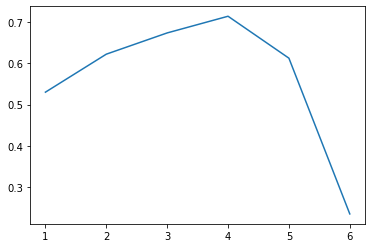

In [19]:
Rsq_test = []
order = [1,2,3,4,5,6]
for x in order:
    pr = PolynomialFeatures(degree=x)
    x_pr = pr.fit_transform(X)
    lm = LinearRegression()
    lm.fit(x_pr, y)
    Rsq_test.append(lm.score(x_pr, y))
plt.plot(order,Rsq_test)
plt.show()

In [20]:
pr = PolynomialFeatures(degree=5)
X = pr.fit_transform(X)
x_train_pr, x_test_pr, y_train_pr, y_test_pr = train_test_split(X, y, test_size=0.2, random_state=6)
poly = LinearRegression()
poly.fit(x_train_pr, y_train_pr)

LinearRegression()

<h1 style='font-family: Trebuchet MS; color:#34495E'> Model Evaluation <a id='4'></a></h1>

In [21]:
tree_mse = mean_squared_error(y_train, dTree.predict(x_train))
tree_mae = mean_absolute_error(y_train, dTree.predict(x_train))
tree_rmse = sqrt(tree_mse)
rf_mse = mean_squared_error(y_train, rForest.predict(x_train))
rf_mae = mean_absolute_error(y_train, rForest.predict(x_train))
rf_rmse = sqrt(rf_mse)

In [22]:
kNeighbors_mse = mean_squared_error(y_train, kNeighbors.predict(x_train))
kNeighbors_mae = mean_absolute_error(y_train, kNeighbors.predict(x_train))
kNeighbors_rmse = sqrt(kNeighbors_mse)

In [23]:
LRegression_mse = mean_squared_error(y_train, LRegression.predict(x_train))
LRegression_mae = mean_absolute_error(y_train, LRegression.predict(x_train))
LRegression_rmse = sqrt(LRegression_mse)

In [24]:
poly_mse = mean_squared_error(y_train_pr, poly.predict(x_train_pr))
poly_mae = mean_absolute_error(y_train_pr, poly.predict(x_train_pr))
polyn_rmse = sqrt(LRegression_mse)

In [25]:
MSE = [tree_mse, rf_mse, kNeighbors_mse, LRegression_mse, poly_mse]
MSE = pd.DataFrame(MSE)
MAE = [tree_mae, rf_mae, kNeighbors_mae, LRegression_mae, poly_mae]
MAE = pd.DataFrame(MAE)
RMSE = [tree_rmse, rf_rmse, kNeighbors_rmse, LRegression_rmse, polyn_rmse]
RMSE = pd.DataFrame(RMSE)

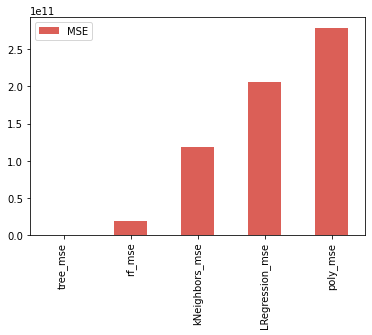

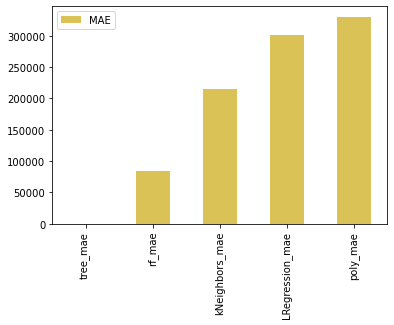

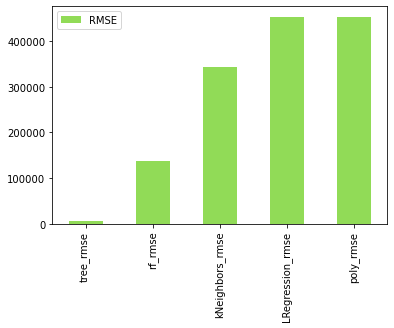

In [26]:
MSE.plot(kind='bar', color=sns.color_palette("hls", 8)[0])
plt.legend(labels=['MSE'])
plt.xticks(ticks = [0,1,2,3,4], labels=['tree_mse', 'rf_mse', 'kNeighbors_mse', 'LRegression_mse', 'poly_mse'])
MAE.plot(kind='bar', color=sns.color_palette("hls", 8)[1])
plt.legend(labels=['MAE'])
plt.xticks(ticks = [0,1,2,3,4], labels=['tree_mae', 'rf_mae', 'kNeighbors_mae', 'LRegression_mae', 'poly_mae'])
RMSE.plot(kind='bar', color=sns.color_palette("hls", 8)[2])
plt.legend(labels=['RMSE'])
plt.xticks(ticks = [0,1,2,3,4], labels=['tree_rmse', 'rf_rmse', 'kNeighbors_rmse', 'LRegression_rmse', 'poly_rmse'])
plt.show()

In [27]:
df_numerical.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Propertycount', 'Age'],
      dtype='object')

<h4 style='font-family: Trebuchet MS; color:#34495E'> Conclusion: <a id='2.1'></a></h4>
<p style='font-family: Trebuchet MS'> By comparing MAE, MSE, RMSE, we can see that the DecisionTreeRegressor model, dTree has the lowest errors among all while LinearRegression model, LRegression has the highest errors. It infers that <code>DecisionTreeRegressor</code> model would be a better model to predict the target variable <code>HousePrice</code> with the predictor variables <code>Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'Propertycount', 'Age'</code>.